# Stirlingの公式（対数近似）
* $\log n! \sim n\log n - n$
* $n!$はおおよそ$\left(\frac{n}{e}\right)^n$になる
* [スターリングの公式（対数近似編）](https://starpentagon.net/analytics/stirling_log_formula/)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## $\log n!$の上からの評価

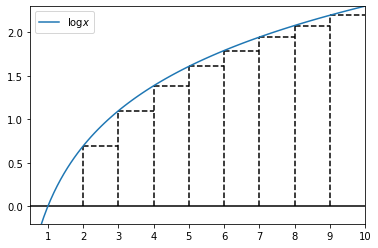

In [2]:
MIN_X = 0.5
MAX_X = 10

x = np.linspace(MIN_X, MAX_X, 100)
y = np.log(x)

p = plt.plot(x, y, label='$\log x$')
p = plt.hlines([0], MIN_X, MAX_X)

p = plt.xlim(MIN_X, MAX_X-0.5)
p = plt.xticks(range(1, MAX_X+1))
p = plt.ylim([-0.2, 2.3])

# 面積log kの矩形を描画
for k in range(2, MAX_X):
    p = plt.vlines(k, 0, np.log(k), linestyles='dashed')
    p = plt.hlines(np.log(k), k, k+1, linestyles='dashed')

p = plt.legend()
plt.show(p)

## $\log n!$の下からの評価

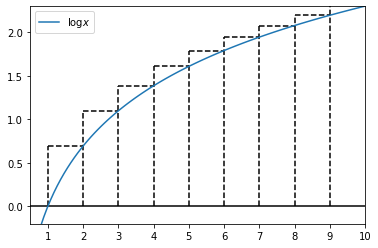

In [3]:
MIN_X = 0.5
MAX_X = 10

x = np.linspace(MIN_X, MAX_X, 100)
y = np.log(x)

p = plt.plot(x, y, label='$\log x$')
p = plt.hlines([0], MIN_X, MAX_X)

p = plt.xlim(MIN_X, MAX_X-0.5)
p = plt.xticks(range(1, MAX_X+1))
p = plt.ylim([-0.2, 2.3])

# 面積log kの矩形を描画
for k in range(2, MAX_X):
    p = plt.vlines(k-1, 0, np.log(k), linestyles='dashed')
    p = plt.hlines(np.log(k), k-1, k, linestyles='dashed')

p = plt.vlines(MAX_X-1, 0, np.log(MAX_X), linestyles='dashed')

p = plt.legend()
plt.show(p)

## $n \log n - n$の近似精度

In [4]:
def log_factorial(n):
    '''log n!を返す'''
    val = 0.0
    
    for i in range(1, n+1):
        val += np.log(i)
        
    return val

In [5]:
# test of log_factorial
eps = 10**-5

assert abs(log_factorial(1) - 0.0) < eps
assert abs(log_factorial(2) - np.log(2)) < eps
assert abs(log_factorial(5) - np.log(120)) < eps

In [6]:
def log_factorial_approx(n):
    '''log n!の近似: n log n - nを返す'''
    return n * np.log(n) - n

In [7]:
# test of log_factorial_approx
assert abs(log_factorial_approx(1) - (-1)) < eps
assert abs(log_factorial_approx(2) - (2 * np.log(2) - 2)) < eps

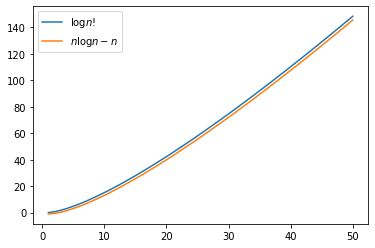

In [8]:
# log_factorial, log_factorial_approxをplot
n_list = range(1, 50+1)
y_fact = [log_factorial(n) for n in n_list]
y_approx = [log_factorial_approx(n) for n in n_list]

p = plt.plot(n_list, y_fact, label='$\log n!$')
p = plt.plot(n_list, y_approx, label='$n \log n - n$')

p = plt.legend()

plt.show(p)

In [9]:
# 近似精度を評価
n_list = [5, 10, 20, 50, 100, 1000]

approx_df = pd.DataFrame()

approx_df['n'] = n_list
approx_df['log n!'] = [log_factorial(n) for n in n_list]
approx_df['n log(n)-n'] = [log_factorial_approx(n) for n in n_list]
approx_df['error(%)'] = 100 * (approx_df['log n!'] - approx_df['n log(n)-n']) / approx_df['log n!']

In [10]:
pd.options.display.float_format = '{:.1f}'.format
approx_df

,n,log n!,n log(n)-n,error(%)
0,5,4.8,3.0,36.4
1,10,15.1,13.0,13.8
2,20,42.3,39.9,5.7
3,50,148.5,145.6,1.9
4,100,363.7,360.5,0.9
5,1000,5912.1,5907.8,0.1


## $n!$と$\left(\frac{n}{e}\right)^n$の比較

In [11]:
n_list = [5, 10, 20, 50, 100]

approx_df = pd.DataFrame()

approx_df['n'] = n_list
approx_df['n!'] = [np.exp(log_factorial(n)) for n in n_list]
approx_df['(n/e)^n'] = [np.exp(log_factorial_approx(n)) for n in n_list]
approx_df['error(%)'] = 100 * (approx_df['n!'] - approx_df['(n/e)^n']) / approx_df['n!']

In [12]:
pd.options.display.float_format = None
pd.options.display.precision = 2

approx_df

,n,n!,(n/e)^n,error(%)
0,5,1.20e+02,2.11e+01,82.45
1,10,3.63e+06,4.54e+05,87.49
2,20,2.43e+18,2.16e+17,91.12
3,50,3.04e+64,1.71e+63,94.37
4,100,9.33e+157,3.72e+156,96.01
